#### **Pregunta:**

¿Cómo ha evolucionado la demanda de habilidades en el mercado laboral desde la
introducción generalizada de la IA, y qué nuevas competencias han surgido como las
más valoradas?

Usaremos los dataset **tech_layoffs** y **IA_impact_on_jobs**, dado que no logramos dar con un dataset que posea datos referente a contratos, analizaremos el data set de despidos (tech_layoffs) de manera que las industrias con menos despidos a lo largo del tiempo seran las que estan siendo mas demandadas recurrentemente

El data set **tech_layoffs** trata sobre reportes de despidos de empresas desde 2020 a 2024, cada empresa posee una industria para poder identificar el tipo de empresa de forma mas general. Este dataset posee columnas de porcentaje de el reporte de despidos, se usara para conocer las industrias que reducen estos numeros porcentuales con el tiempo. El data set **IA_impact_on_jobs** no requeriremos de trabajarlo mucho dado que posee en orden distintos tipos de industrias y su porcentaje de influenciabilidad con las inteligencias artificiales

In [ ]:
import pandas as pd
import os

df_IA_impact = pd.read_csv(os.path.join("data","IA_impact_on_jobs.csv")).head(10) #guardamos solo los 10 primeros

df_layoffs = pd.read_csv(os.path.join("data","tech_layoffs_Q2_2024.csv"))
#lectura del data set data\tech_layoffs.xlsx
df_layoffs2 = pd.read_excel(os.path.join("data","tech_layoffs.xlsx"))

#juntamos los dos dataframes
df_layoffs = pd.concat([df_layoffs,df_layoffs2])
df_layoffs = df_layoffs.reset_index(drop=True)

In [2]:
# limpieza de df_layoffs

#se eliminan filas que tengan la columna Laid_Offs en NaN
df_layoffs = df_layoffs.dropna(subset=['Laid_Off'])
#se eliminan las filas que tengan la columna INdustry en NaN
df_layoffs = df_layoffs.dropna(subset=['Industry'])
#se eliminan las filas que tengan la columna Percentage en NaN
df_layoffs = df_layoffs.dropna(subset=['Percentage'])
#la columna Percentaje esta en formato object como "xx,x", lo pasamos a float eliminando la coma
df_layoffs['Percentage'] = df_layoffs['Percentage'].str.replace(',','.').astype(float)

# las columnas limpiadas son las esenciales para el analisis
df_layoffs

,#,Company,Location_HQ,Region,State,Country,Continent,Laid_Off,Date_layoffs,Percentage,...,Company_Size_after_layoffs,Industry,Stage,Money_Raised_in__mil,Year,latitude,longitude,Money_Raised_in_$_mil,lat,lng
0,1,Tamara Mellon,Los Angeles,NaN,California,USA,North America,20.0,2020-03-12,40.0,...,30,Retail,Series C,90.0,2020,34.053691,-118.242766,NaN,NaN,NaN
1,2,HopSkipDrive,Los Angeles,NaN,California,USA,North America,8.0,2020-03-13,10.0,...,72,Transportation,Unknown,45.0,2020,34.053691,-118.242766,NaN,NaN,NaN
2,3,Panda Squad,San Francisco,San Francisco Bay Area,California,USA,North America,6.0,2020-03-13,75.0,...,2,Consumer,Seed,1.0,2020,37.779259,-122.419329,NaN,NaN,NaN
3,4,Help.com,Austin,NaN,NaN,USA,North America,16.0,2020-03-16,100.0,...,0,Support,Seed,6.0,2020,30.271129,-97.743700,NaN,NaN,NaN
4,5,Inspirato,Denver,NaN,NaN,USA,North America,130.0,2020-03-16,22.0,...,461,Travel,Series C,79.0,2020,39.739236,-104.984862,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3484,3511,Udaan,Bengaluru,NaN,NaN,India,Asia,100.0,2023-12-18 00:00:00,NaN,...,900.0,Retail,Unknown,NaN,2024,NaN,NaN,"$1,500",12.97194,77.59369
3492,3519,Cruise,San Francisco Bay Area,NaN,NaN,USA,North America,900.0,2023-12-14 00:00:00,NaN,...,2850.0,Transport…,Acquired,NaN,2024,NaN,NaN,"$15,000",37.77493,-122.41942
3499,3526,Invitae,San Francisco Bay Area,NaN,NaN,USA,North America,235.0,2023-12-13 00:00:00,NaN,...,1331.0,Healthcare,Post-IPO,NaN,2024,NaN,NaN,"$2,500",37.77493,-122.41942
3500,3527,Etsy,New York City,NaN,NaN,USA,North America,225.0,2023-12-13 00:00:00,NaN,...,1820.0,Retail,Post-IPO,NaN,2024,NaN,NaN,$97,40.71427,-74.00597


In [3]:
# Usaremos la columna Industry y percentaje para el analisis, inicialmente haremos un diccionario donde almacenaremos
# el promedio de Percentaje de despidos por industria
# para hacerlo con mas sentido, crearemos antes un dataframe para cada anio (2020, 2021, 2022, 2023, 2024)

df_layoffs_2020 = df_layoffs[df_layoffs['Year'] == 2020]
df_layoffs_2021 = df_layoffs[df_layoffs['Year'] == 2021]
df_layoffs_2022 = df_layoffs[df_layoffs['Year'] == 2022]
df_layoffs_2023 = df_layoffs[df_layoffs['Year'] == 2023]
df_layoffs_2024 = df_layoffs[df_layoffs['Year'] == 2024]

# ahora creare una funcion para crear un diccionario que contenga el promedio de despidos por industria
def promedio_despidos(df):
    promedio = {}
    for industry in df['Industry'].unique():
        promedio[industry] = df[df['Industry'] == industry]['Percentage'].mean()
    return promedio

# ahora aplicamos la funcion a cada dataframe
promedio_2020 = promedio_despidos(df_layoffs_2020)
promedio_2021 = promedio_despidos(df_layoffs_2021)
promedio_2022 = promedio_despidos(df_layoffs_2022)
promedio_2023 = promedio_despidos(df_layoffs_2023)
promedio_2024 = promedio_despidos(df_layoffs_2024)

# ahora crearemos un dataframe con los promedios de despidos por industria para cada anio
df_promedio_2020 = pd.DataFrame(promedio_2020.items(), columns=['Industry', 'Promedio_2020'])
df_promedio_2021 = pd.DataFrame(promedio_2021.items(), columns=['Industry', 'Promedio_2021'])
df_promedio_2022 = pd.DataFrame(promedio_2022.items(), columns=['Industry', 'Promedio_2022'])
df_promedio_2023 = pd.DataFrame(promedio_2023.items(), columns=['Industry', 'Promedio_2023'])
df_promedio_2024 = pd.DataFrame(promedio_2024.items(), columns=['Industry', 'Promedio_2024'])

# ahora unimos los dataframes en uno solo
df_promedio = pd.merge(df_promedio_2020, df_promedio_2021, on='Industry', how='outer')
df_promedio = pd.merge(df_promedio, df_promedio_2022, on='Industry', how='outer')
df_promedio = pd.merge(df_promedio, df_promedio_2023, on='Industry', how='outer')
df_promedio = pd.merge(df_promedio, df_promedio_2024, on='Industry', how='outer')

# para cada fila, si hay existencia de 3 o mas Nan por columna, se elimina la fila
df_promedio = df_promedio.dropna(thresh=3)

df_promedio.iloc[:, 1:] = df_promedio.iloc[:, 1:].replace(100, pd.NA)
df_promedio.iloc[:, 1:] = df_promedio.iloc[:, 1:].apply(
    lambda row: row.fillna(row.mean()), axis=1
)

C:\Users\adria\AppData\Local\Temp\ipykernel_5432\1283205534.py:41: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0      NaN
1      NaN
4     <NA>
5      NaN
6      NaN
7     27.0
8     70.0
9      NaN
11     NaN
13     NaN
14    14.0
16     NaN
17     NaN
18     NaN
21     7.0
24     NaN
25     NaN
27    <NA>
28     NaN
30    15.0
31     NaN
32    17.0
34    <NA>
36     NaN
37     NaN
39     NaN
40     NaN
41    40.0
43     NaN
44     NaN
Name: Promedio_2021, dtype: object' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_promedio.iloc[:, 1:] = df_promedio.iloc[:, 1:].replace(100, pd.NA)
C:\Users\adria\AppData\Local\Temp\ipykernel_5432\1283205534.py:41: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0           NaN
1          <NA>
4          29.5
5     21.708333
6          21.8
7        23.875
8     2

In [4]:
# para determinar las industrias con menores despidos al pasar el tiempo
# anadimos una columna que se llamara "diff_temporal" que sera de la siguiente manera:
# (Promedio_2021 - Promedio_2022) + (Promedio_2022 - Promedio_2023) + (Promedio_2023 - Promedio_2024)
# esto nos permitira ver la tendencia de despidos por industria

df_promedio['diff_temporal'] = df_promedio['Promedio_2021'] - df_promedio['Promedio_2022'] + df_promedio['Promedio_2022'] - df_promedio['Promedio_2023'] + df_promedio['Promedio_2023'] - df_promedio['Promedio_2024']

# eliminare las columna promedio_2020 dado que es bastante influenciada por la pandemia covid-19
df_promedio = df_promedio.drop(['Promedio_2020'], axis=1)

# ordenamos el dataframe por la columna diff_temporal
df_promedio = df_promedio.sort_values(by='diff_temporal', ascending=False).head(10)

# ahora la eliminamos
df_promedio = df_promedio.drop(['diff_temporal'], axis=1)
df_promedio

,Industry,Promedio_2021,Promedio_2022,Promedio_2023,Promedio_2024
8,Education,70.0,24.851852,24.066667,14.375000
7,Data,27.0,23.875,16.750000,13.000000
31,Product,21.041667,15.916667,21.500000,8.000000
32,Real Estate,17.0,24.72963,18.285714,4.000000
1,Aerospace,31.25,31.25,17.500000,21.250000
41,Transportation,40.0,16.444118,23.360000,31.857143
6,Crypto,17.575,21.8,24.500000,10.000000
36,Sales,12.872086,10.090909,17.230769,7.500000
13,Fitness,19.852679,18.125,13.000000,15.000000
27,Marketing,16.457557,17.794118,15.777778,11.625000


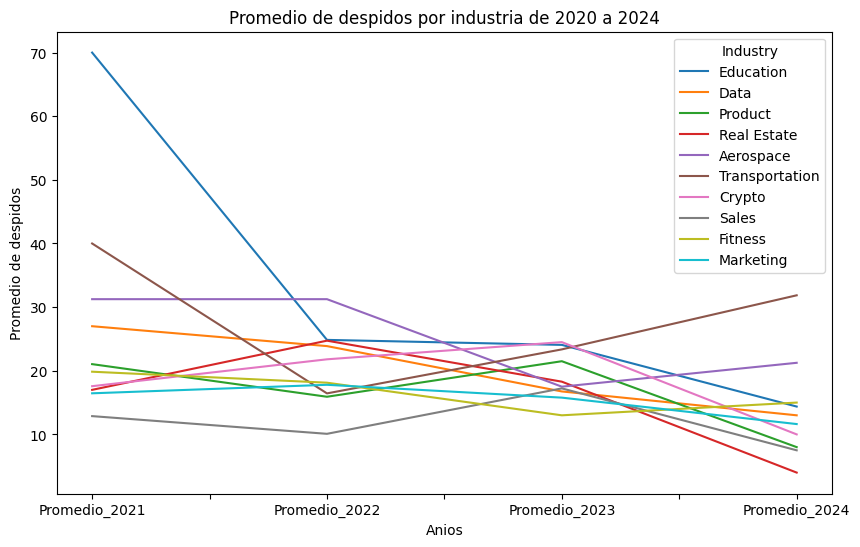

In [5]:
# Graficamos como es el comportamiento de los despidos por industria al pasar los anios 2021 a 2024
import matplotlib.pyplot as plt

df_promedio.set_index('Industry').T.plot(kind='line', figsize=(10, 6))
plt.ylabel('Promedio de despidos')
plt.xlabel('Anios')
plt.title('Promedio de despidos por industria de 2020 a 2024')
plt.show()

Podemos deducir aca que las habilidades demandadas en los ultimos anios se dividen en dos pilares, uno donde es indispensable la existencia de personas (como Education, Real Estate, Aerospace, fitness) y otro donde la inteligencia artificial forma parte del ambiente laboral y suele ser mantenido por los mismos trabajadores tal como (Data, Crypto, Marketing, Sales)

En el dataset **IA_impact_on_jobs** podemos notar que los trabajos con mayor impacto de IA son precisamente analogos a los anteriores mencionados (los del pilar referente a donde la IA forma parte del ambiente laboral), en este caso serian: Data & IT, Administrative & Clerical, Sales & Marketing, Supply Chain & Logistics

In [10]:
df_IA_impact

,Job titiles,AI Impact,Tasks,AI models,AI_Workload_Ratio,Domain
0,Communications Manager,98%,365,2546,0.143362,Communication & PR
1,Data Collector,95%,299,2148,0.139199,Data & IT
2,Data Entry,95%,325,2278,0.142669,Administrative & Clerical
3,Mail Clerk,95%,193,1366,0.141288,Leadership & Strategy
4,Compliance Officer,92%,194,1369,0.141709,Medical & Healthcare
5,Chief Executive Officer (CEO),91%,153,1135,0.134802,Supply Chain & Logistics
6,Therapist,90%,114,983,0.115972,Law Enforcement
7,Chief Strategy Officer,90%,184,1284,0.143302,Construction
8,Admin,90%,253,2014,0.125621,Sales & Marketing
9,General Clerk,90%,242,1903,0.127168,Hospitality
